In [109]:
#from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from collections import Counter
import numpy as np
import pandas as pd
from tqdm import tqdm
import numba
#from numba import jit
#from numba import njit, prange
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [232]:
@numba.jit(nopython=True)
def calc_entropy(data, anno, radius, three):
    total_entropy = 0
    m, n = data.shape
    for i in range(m):
        if three:
            #ids = (np.linalg.norm(point-data))
            ids = (np.sqrt((data[i][0] - data[:,0])**2 + (data[i][1] - data[:,1])**2 + (data[i][2] - data[:,2])**2) < radius)
        else:
            ids = (np.sqrt((data[i][0] - data[:,0])**2 + (data[i][1] - data[:,1])**2) < radius)
        if ids.sum() < 2:
            continue
        a = anno[ids]
        uc = np.bincount(a)
        ii = np.nonzero(uc)[0]
        v = np.array(list(zip(ii,uc[ii])))[:, 1]
        n = v.sum()
        p = v/n
        si = -(p*np.log(p)).sum()
        total_entropy += si
    return total_entropy

In [98]:
###### 3D MCA #######
def read3d(path):
    df = pd.read_csv(path, sep="\t")#.sample(n=10000, random_state=1)
    labels = df["TypeInt"].values
    X = df[[df.columns[0], df.columns[1], df.columns[2]]].values
    return X, labels

##### 2D MCA ####
def read2d(path):
    df = pd.read_csv(path, sep="\t")#.sample(n=10000, random_state=1)
    labels = df["TypeInt"].values
    X = df[[df.columns[0], df.columns[1]]].values
    return X, labels


In [117]:
X3d, _ = read3d("Gastrulation_Input_3D_TSNE.txt")
X2d, labels = read2d("Gastrulation_Input_2D_TSNE.txt")

## total entropy for dataset
uc = np.bincount(labels)
ii = np.nonzero(uc)[0]
v = np.array(list(zip(ii,uc[ii])))[:,1]
p = v/v.sum()
si = -(p*np.log(p)).sum()

[ 19629 115192  31025  31900  84474  81600   4703  41763  71507  14290
  46503  79664  84241  63763  63016 110308 109646  74724  13862   5733
   9152  26670  20094  74133  39725    156  68820  88200  74703 112499]
88.30674272145335


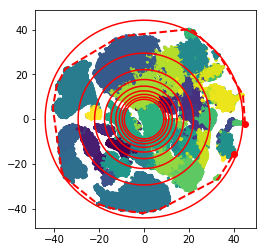

In [229]:
## Find two points furthest away from each other
hull = ConvexHull(X2d)
print(hull.vertices)
dists = (np.linalg.norm(X2d[hull.vertices][:,None] - X2d[hull.vertices], axis=-1))
flat_list = [item for sublist in dists for item in sublist]
max_dist = dists.max()
print(max_dist)

####
fig, ax = plt.subplots(1)
theta = np.linspace(0, 2*np.pi, 100)
for i in range(2,11):
    dist = max_dist / i
    r = (dist)
    x1 = r*np.cos(theta)
    x2 = r*np.sin(theta)
    
    ax.plot(x1, x2, c='r')
    
plt.scatter(X2d[:,0], X2d[:,1], s=5, c=labels)
plt.plot(X2d[hull.vertices,0], X2d[hull.vertices,1], 'r--', lw=2)
plt.plot(X2d[hull.vertices[0],0], X2d[hull.vertices[0],1], 'ro')
plt.plot(X2d[hull.vertices[-1],0], X2d[hull.vertices[-1],1], 'ro')



## 3D ##
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2], c=labels)
#ax.plot(X3d[hull.vertices,0], X3d[hull.vertices,1], X3d[hull.vertices,2], 'r--', lw=2)
ax.set_aspect(1)
plt.show()

In [233]:
entropy3d = calc_entropy(X3d, labels, 0.2, True)
entropy2d = calc_entropy(X2d, labels, 0.2, False)
print(entropy3d)
print(entropy2d)

LoweringError: Failed at nopython (nopython mode backend)
[1m[1miterating over 2D array
[1m
File "<ipython-input-232-490fe57b185c>", line 4:[0m
[1mdef calc_entropy(data, anno, radius, three):
    <source elided>
    total_entropy = 0
[1m    for point in data:
[0m    [1m^[0m[0m[0m
[0m[1m[1] During: lowering "$12.2 = iternext(value=$phi12.1)" at <ipython-input-232-490fe57b185c> (4)[0m
-------------------------------------------------------------------------------
This should not have happened, a problem has occurred in Numba's internals.

Please report the error message and traceback, along with a minimal reproducer
at: https://github.com/numba/numba/issues/new

If more help is needed please feel free to speak to the Numba core developers
directly at: https://gitter.im/numba/numba

Thanks in advance for your help in improving Numba!


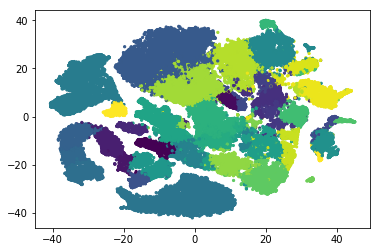

In [15]:
plt.scatter(X2d[:,0], X2d[:,1], s=5, c=labels)